In [1]:
%pylab inline
import pandas as pd
import sys
import gc
import keras

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
keras.__version__

'2.1.2'

In [3]:
def read_data():
    a=np.load("../input/train_test.npy.npz")
    cols=a['columns']
    arr=a['data']
    arr=np.rollaxis(arr,0,3)
    return cols,arr

In [4]:
columns,data=read_data()
len(columns),data.shape

(32, (829, 517, 32))

In [5]:
gc.collect()

15

In [5]:
def show_data(store,date,filters=None):
    idx_range=np.array(range(date-6,date+3))
    
    ab=np.squeeze(data[store,idx_range,:])
    print ab.shape
    filtered_columns=columns
    if filters is not None: 
        filtered_columns = [u for u in columns if filters(u)]
    df=pd.DataFrame(ab,columns=columns,index=idx_range)[filtered_columns]
    with pd.option_context('display.max_columns', None):
        display(df)

In [6]:
#show_data(0,1000,1688, None)#lambda u: 'y_0' in u)
show_data(1,480, None)

(9, 32)


visitors  geo1_visitors_mean  geo2_visitors_mean  station_visitors_mean  \
474  2.197225            2.792386            2.804710               2.798461   
475  0.693147            2.765645            2.786872               2.775045   
476  3.295837            2.989259            2.933753               2.997830   
477  1.945910            2.952686            2.681583               2.952331   
478       NaN                 NaN                 NaN                    NaN   
479       NaN                 NaN                 NaN                    NaN   
480       NaN                 NaN                 NaN                    NaN   
481       NaN                 NaN                 NaN                    NaN   
482       NaN                 NaN                 NaN                    NaN   

     genre_name_visitors_mean  day_of_week_visitors_mean  visitor_lag7  \
474                  2.835563                   2.754815      1.098612   
475                  2.595427                   2.713762      2.639057   
476                  3.089247                   2.999000      2.079442   
477                  3.049276                   3.075529      0.693147   
478                       NaN                        NaN           NaN   
479                       NaN                        NaN      1.098612   
480                       NaN                        NaN      0.693147   
481                       NaN                        NaN      2.197225   
482                       NaN                        NaN      0.693147   

     visitor_lag14  visitor_lag28  visitor_lag91  visitor_lag182  \
474       3.044523       2.944439       2.079442        1.386294   
475       1.945910       2.397895       1.098612        2.484907   
476       1.945910       2.944439       1.609438        2.833213   
477       0.693147       0.693147       1.945910        2.079442   
478            NaN            NaN            NaN             NaN   
479       2.397895       2.484907       2.995732        2.484907   
480       2.197225       2.484907       1.945910        3.218876   
481       1.098612       1.945910       2.397895        2.484907   
482       2.639057       2.708050       2.890372        2.302585   

     visitor_lag364  visitor_ma2  visitor_ma4  visitor_ma7  visitor_ma14  \
474             NaN     1.445186     1.329661     1.566772      1.639944   
475             NaN     1.445186     1.170533     1.242453      1.535547   
476             NaN     1.994492     1.719839     1.445186      1.648041   
477             NaN     2.620873     2.033030     1.653980      1.752438   
478             NaN     1.945910     1.978298     1.653980      1.752438   
479             NaN          NaN     2.620873     1.765053      1.693760   
480             NaN          NaN          NaN     2.033030      1.643414   
481             NaN          NaN          NaN     1.978298      1.703947   
482             NaN          NaN          NaN          NaN      1.587058   

     visitor_ma28  visitor_ma56  visitor_ma112  visitor_ma224  visitor_sma1  \
474      1.997905      2.047402       2.102917       2.120381      2.197225   
475      1.926874      2.004159       2.085725       2.110672      0.693147   
476      1.941515      2.022180       2.088222       2.118680      3.295837   
477      1.993714      2.050019       2.086508       2.117521      1.945910   
478      1.993714      2.050019       2.086508       2.117521           NaN   
479      1.972358      2.060032       2.086508       2.117521           NaN   
480      1.949060      2.075701       2.086508       2.117521           NaN   
481      1.949210      2.048482       2.086508       2.117521           NaN   
482      1.911268      2.029342       2.090102       2.117521           NaN   

     visitor_sma2  visitor_sma3  visitor_sma4  visitor_sma8  visitor_sma16  \
474      1.647918      2.113453      2.071568      2.376742            NaN   
475      1.666102      1.759372      1.996541           NaN            NaN

In [7]:
517-478

39

In [8]:
def show_data2():
    lst=[]
    days=range(475,485)
    for i in range(len(columns)):
        print i,
        lst.append(columns[i])
        if 1:
            for d in days:
                u=data[:,d,i]
                lst.append(np.round(np.isnan(u).mean(),4))
            #break
    print len(lst)
    df=pd.DataFrame(np.array(lst).reshape([-1,len(days)+1]) ,columns=['col']+days)
    return df

In [9]:
show_data2()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 352


col     475     476     477     478     479     480  \
0                    visitors  0.0965  0.0543  0.0663     1.0     1.0     1.0   
1          geo1_visitors_mean     0.0     0.0     0.0     1.0     1.0     1.0   
2          geo2_visitors_mean     0.0     0.0     0.0     1.0     1.0     1.0   
3       station_visitors_mean     0.0     0.0     0.0     1.0     1.0     1.0   
4    genre_name_visitors_mean     0.0     0.0     0.0     1.0     1.0     1.0   
5   day_of_week_visitors_mean     0.0     0.0     0.0     1.0     1.0     1.0   
6                visitor_lag7  0.0856  0.0458  0.0748  0.2666   0.228  0.1279   
7               visitor_lag14  0.0977  0.0555    0.07  0.2847  0.2195  0.1255   
8               visitor_lag28   0.082  0.0483  0.0639  0.2762  0.1954  0.1122   
9               visitor_lag91  0.1025  0.0591  0.0796  0.2738   0.234  0.1351   
10             visitor_lag182  0.1013  0.0603  0.0953  0.2955  0.2388  0.1375   
11             visitor_lag364   0.655  0.6369  0.6466  0.7358  0.7081  0.6622   
12                visitor_ma2  0.0338  0.0265  0.0253  0.0663     1.0     1.0   
13                visitor_ma4  0.0326  0.0277  0.0265   0.041  0.0953     1.0   
14                visitor_ma7  0.0205  0.0217  0.0229  0.0277  0.0374  0.0603   
15               visitor_ma14  0.0302  0.0302   0.029  0.0326  0.0362  0.0434   
16               visitor_ma28  0.0302  0.0314  0.0326   0.035  0.0362  0.0362   
17               visitor_ma56  0.0302  0.0302  0.0302  0.0302  0.0326  0.0326   
18              visitor_ma112  0.0374  0.0374  0.0374  0.0374  0.0374  0.0374   
19              visitor_ma224  0.0446  0.0458  0.0458  0.0458  0.0458  0.0458   
20               visitor_sma1  0.0965  0.0543  0.0663     1.0     1.0     1.0   
21               visitor_sma2  0.1303   0.076  0.1037     1.0     1.0     1.0   
22               visitor_sma3  0.1653  0.0989  0.1267     1.0     1.0     1.0   
23               visitor_sma4  0.1894  0.1255  0.1472     1.0     1.0     1.0   
24               visitor_sma8   0.263  0.1761  0.1978     1.0     1.0     1.0   
25              visitor_sma16  0.4922  0.3088  0.3233     1.0     1.0     1.0   
26              visitor_sma32  0.6707  0.5657  0.7322     1.0     1.0     1.0   
27                       TMAX     0.0     0.0     0.0     0.0     0.0     0.0   
28                       TMIN     0.0     0.0     0.0     0.0     0.0     0.0   
29                       TAVG     0.0     0.0     0.0     0.0     0.0     0.0   
30                       PRCP  0.9626   0.965  0.9469  0.4041   0.994     1.0   
31                    holiday     0.0     0.0     0.0     0.0     0.0     0.0   

       481     482     483     484  
0      1.0     1.0     1.0     1.0  
1      1.0     1.0     1.0     1.0  
2      1.0     1.0     1.0     1.0  
3      1.0     1.0     1.0     1.0  
4      1.0     1.0     1.0     1.0  
5      1.0     1.0     1.0     1.0  
6   0.1146  0.0965  0.0543  0.0663  
7   0.1375  0.0856  0.0458  0.0748  
8   0.1194  0.0832  0.0519    0.07  
9    0.123  0.1001  0.0579  0.0856  
10  0.1363  0.1146  0.0748  0.0832  
11  0.6574  0.6417  0.6622  0.6622  
12     1.0     1.0     1.0     1.0  
13     1.0     1.0     1.0     1.0  
14   0.158     1.0     1.0     1.0  
15  0.0555  0.0965  0.2244  0.6007  
16  0.0374  0.0434  0.0507  0.0639  
17  0.0338  0.0338  0.0338  0.0338  
18  0.0374  0.0374  0.0374  0.0386  
19  0.0458   0.047   0.047   0.047  
20     1.0     1.0     1.0     1.0  
21     1.0     1.0     1.0     1.0  
22     1.0     1.0     1.0     1.0  
23     1.0     1.0     1.0     1.0  
24     1.0     1.0     1.0     1.0  
25     1.0     1.0     1.0     1.0  
26     1.0     1.0     1.0     1.0  
27     0.0     0.0     0.0     0.0  
28     0.0     0.0     0.0     0.0  
29     0.0     0.0     0.0     0.0  
30  0.6719  0.0483    0.93  0.9505  
31     0.0     0.0     0.0     0.0

# cv

In [10]:
class IndexIterator():
    def __init__(self,index):
        self.index=index
        self.N=len(self.index)
        self.shuffle()
        self.pos=0
    def shuffle(self):
        np.random.shuffle(self.index)
        
    def next(self):
        if self.pos>=self.N:
            self.pos=0
            self.shuffle()
        r=self.index[self.pos]
        self.pos+=1
        return r
    
class DataGen():
    def __init__(self,lag_X,ondate_X, rawy, low,high,lookback1=28,
                 lookforward=39,batchsize=4096,valid_split=0.0):
        assert valid_split>=0 and valid_split<1
        assert low>=lookback1
        self.lookback1=lookback1
        self.lookforward=lookforward
        self.batchsize=batchsize
        a,b=rawy.shape
        assert high+lookforward <=b 
        assert len(lag_X)==len(rawy)
        assert lag_X.shape[:2]==ondate_X.shape[:2]
        self._shape=(a,high-low)
        self.lag_X=lag_X
        self.ondate_X=ondate_X
        self.mask=np.ones_like(rawy)
        self.mask[:,478:]=0
        self.rawy=rawy
        self.low=low
        self.high=high

        N=a*(high-low)
        self.N=N
        if valid_split==0:
            self.train_iterator=IndexIterator(np.array(range(N)))
            print "train has {} records out of {} records".format(self.train_iterator.N,np.prod(self._shape))
            self.valid_iterator=None
        else:
            if 0:
                indexes=np.array(range(self.N))
                np.random.shuffle(indexes)
                train_N=int(1.0*(1-valid_split)*N)
                self.train_iterator=IndexIterator(indexes[:train_N])
                self.valid_iterator=IndexIterator(indexes[train_N:])
                print "train has {} records out of {} records".format(self.train_iterator.N,np.prod(self._shape))
                print "valid has {} records out of {} records".format(self.valid_iterator.N,np.prod(self._shape))
            else:
                indexes=np.array(range(self.N)).reshape(self._shape)
                np.random.shuffle(indexes)
                train_N=int(1.0*(1-valid_split)*indexes.shape[0])
                train_idx=indexes[:train_N].reshape([-1])
                valid_idx=indexes[train_N:].reshape([-1])
                np.random.shuffle(train_idx)
                np.random.shuffle(valid_idx)
                self.train_iterator=IndexIterator(train_idx)
                self.valid_iterator=IndexIterator(valid_idx)
                print "train has {} records out of {} records".format(self.train_iterator.N,np.prod(self._shape))
                print "valid has {} records out of {} records".format(self.valid_iterator.N,np.prod(self._shape))

    @property
    def train_steps_per_epoch(self):
        return int(self.train_iterator.N/self.batchsize)
    @property
    def valid_steps_per_epoch(self):
        return int(self.valid_iterator.N/self.batchsize)    
    
    def support_valid(self):
        return self.valid_iterator is not None
    
    def idx_to_cord(self,idxes):
        _,b=self._shape
        
        xy=idxes
        y=xy%b + self.low
        x=xy//b
        return x,y
    def slice(self,cord_x,cord_z):
        #assert cord_z-self.lookback>=0
        lag_arr=self.lag_X[cord_x, (cord_z-self.lookback1):cord_z] #on non zero target lstm
        ondate_arr=self.ondate_X[cord_x, cord_z: (cord_z+self.lookforward)] # on non zero target fc
        target_y=self.rawy[cord_x , cord_z: (cord_z+self.lookforward)]         # output 
        mask_y=self.mask[cord_x , cord_z: (cord_z+self.lookforward)]        
        
        assert (ondate_arr.shape[0]==self.lookforward) & (lag_arr.shape[0]==self.lookback1) \
            &   (target_y.shape[0]==self.lookforward)
        return   lag_arr,  ondate_arr,    target_y, mask_y

    def next_batch(self,iterator):
        lag_arr=[]; ondate_arr=[];   target_y=[]; mask_y=[]
        while len(lag_arr)<self.batchsize:
            num=iterator.next()
            a,b,d,e=self.__getitem__(num)
            lag_arr.append(a)
            ondate_arr.append(b)
            target_y.append(d)
            mask_y.append(e)
        target=np.array(target_y,copy=False).astype(np.float32,copy=False)
        return {'lagx': np.array(lag_arr,copy=False).astype(np.float32,copy=False), 
                'ondatex': np.array(ondate_arr,copy=False).astype(np.float32,copy=False), 
                'masky':np.array(mask_y,copy=False).astype(np.float32,copy=False)
               }, [target,target]
    
    def next_train_batch(self):
        while 1:
            yield self.next_batch(self.train_iterator)
    
    def next_valid_batch(self):
        while 1:
            yield self.next_batch(self.valid_iterator)
       
    def __getitem__(self, num):
        crod_x,cord_z=self.idx_to_cord(num)
        return self.slice(crod_x,cord_z)
    def get_by_t(self,store,day):
        return self.slice(store,day)
    def get_by_t2(self,day):
        lag_arr=[]; ondate_arr=[];  target_y=[];mask_y=[]
        m,_=self._shape
        indexes=[]
        for i in range(m):
            a,b,d,e=self.get_by_t(i,day)
            lag_arr.append(a)
            ondate_arr.append(b)
            target_y.append(d)
            mask_y.append(e)
            indexes.append(i)
        return {'lagx': np.array(lag_arr).astype(np.float32), 
                'ondatex': np.array(ondate_arr).astype(np.float32), 
                'masky':np.array(mask_y,copy=False).astype(np.float32,copy=False)
               }, np.array(target_y).astype(np.float32), np.array(indexes),mask_y


In [87]:
n_reg_lookback=42
n_lookforward=1

In [88]:
def get_index(cols):
    lst=[]
    for c in cols:
        lst.append(np.where(columns==c)[0][0])
    return np.array(lst)

In [89]:
rawy=data[:,:,get_index(['visitors'])[0]].copy()
rawy.shape

TypeError: unhashable type

In [90]:
def normalize(arr):
    m=np.nanmean(arr.reshape(-1,arr.shape[-1]),0)
    print m.shape, m.min(), m.max()
    m[np.isnan(m)]=0
    if 1:
        s=np.nanstd(arr.reshape(-1,arr.shape[-1]),0)
        s[np.isnan(s)]=0
        r=(arr-m)/(s+1e-7)
        #r[r>4]=4
        #r[r<-4]=-4
    else:
        r=arr-m
    return r

In [91]:
ondate_cols=[ u'visitor_lag91', u'visitor_lag182',
       u'visitor_lag364',u'TMAX', u'TMIN', u'TAVG', u'PRCP', u'holiday']
#ondate_cols=[ u'PRCP']
#ondate_cols=columns
ondate_train_test=data[:,:,get_index(ondate_cols)].copy()
ondate_train_test=normalize(ondate_train_test)
ondate_train_test.shape

TypeError: unhashable type

In [92]:
lag_cols=columns

lag_cols=array([u'visitors', u'geo1_visitors_mean', u'geo2_visitors_mean',
       u'station_visitors_mean', u'genre_name_visitors_mean',
       u'day_of_week_visitors_mean', u'visitor_lag7', u'visitor_lag14',
       u'visitor_lag28', u'visitor_lag91', u'visitor_lag182',
       u'visitor_lag364', u'visitor_ma2', u'visitor_ma4', u'visitor_ma7',
       u'visitor_ma14', u'visitor_ma28', u'visitor_ma56', u'visitor_ma112',
       u'visitor_ma224', u'visitor_sma1', u'visitor_sma2', u'visitor_sma3',
       u'visitor_sma4', u'visitor_sma8', u'visitor_sma16',
       u'visitor_sma32'])
#lag_cols=['holiday']
lag_train_test=data[:,:,get_index(lag_cols)].copy()
lag_train_test=normalize(lag_train_test)
lag_train_test.shape

TypeError: unhashable type

In [93]:
if 0:
    train_gen=DataGen(lag_train_test,ondate_train_test, rawy,n_reg_lookback+1,438, 
                      batchsize=128,lookback1=n_reg_lookback, lookforward=n_lookforward)
    valid_gen=DataGen(lag_train_test,ondate_train_test,rawy,438,458,batchsize=128, lookback1=n_reg_lookback, lookforward=n_lookforward)
    test_gen=DataGen(lag_train_test,ondate_train_test, rawy,458,478, batchsize=128,lookback1=n_reg_lookback, lookforward=n_lookforward)
else:    
    train_gen=DataGen(lag_train_test,ondate_train_test, rawy,n_reg_lookback+1,478-n_lookforward*2, batchsize=128,valid_split=0.1,
                      lookback1=n_reg_lookback,  lookforward=n_lookforward)
    valid_gen=None
    test_gen=DataGen(lag_train_test,ondate_train_test, rawy,478-n_lookforward,478, batchsize=128,lookback1=n_reg_lookback, lookforward=n_lookforward)


train has 323018 records out of 358957 records
valid has 35939 records out of 358957 records
train has 829 records out of 829 records


In [94]:
gc.collect()

0

In [95]:
print train_gen.train_steps_per_epoch
print 0 if valid_gen is None else valid_gen.train_steps_per_epoch

2523
0


In [96]:
#print train_gen.valid_steps_per_epoch

In [97]:
def show_record(datagen, store,day,filter_fn=None):
    lag_arr,  ondate_arr , target_y,_=datagen.get_by_t(store,day)
    df1=pd.DataFrame(ondate_arr,columns=ondate_cols,index=range(day,day+len(ondate_arr)))
    df1['target_y_0']=target_y
    #display(df1)
    df2=pd.DataFrame(lag_arr,columns=lag_cols,index=range(day-len(lag_arr),day))
    #display(df2)
    #display(df3)  
    idx=sorted(set(list(df1.index)+list(df2.index) ))
    df=pd.concat([df1,df2 ],axis=1).loc[idx]
    df['raw_y_0']=rawy[store][df.index]
    if filter_fn:
        df=df[[u for u in df.columns if filter_fn(u)]]
    with pd.option_context('display.max_columns', None):
        display(df)


In [98]:
show_record(train_gen,0,467,filter_fn=lambda u: 'y_0' in u)

target_y_0   raw_y_0
425         NaN  2.890372
426         NaN  3.526361
427         NaN  3.401197
428         NaN  2.944439
429         NaN       NaN
430         NaN  2.944439
431         NaN  3.465736
432         NaN  3.367296
433         NaN  3.663562
434         NaN  3.688879
435         NaN  2.302585
436         NaN       NaN
437         NaN  3.688879
438         NaN  3.367296
439         NaN  3.761200
440         NaN  3.688879
441         NaN  3.637586
442         NaN  1.609438
443         NaN       NaN
444         NaN       NaN
445         NaN  3.367296
446         NaN  3.178054
447         NaN  3.332205
448         NaN  3.555348
449         NaN  2.079442
450         NaN       NaN
451         NaN  3.784190
452         NaN  3.433987
453         NaN  3.970292
454         NaN  3.526361
455         NaN  3.663562
456         NaN  2.079442
457         NaN       NaN
458         NaN  3.526361
459         NaN  2.890372
460         NaN  3.583519
461         NaN  3.401197
462         NaN  2.890372
463         NaN  2.302585
464         NaN       NaN
465         NaN  2.890372
466         NaN  3.784190
467    3.367296  3.367296

In [99]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [100]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

In [101]:
print K.floatx()

float32


In [102]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
#config.intra_op_parallelism_threads=8
#config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [103]:
lag_input_dim=lag_train_test.shape[-1]
ondate_input_dim=ondate_train_test.shape[-1]
lag_input_dim,ondate_input_dim

(27, 8)

In [104]:
class TransformNALayer(Layer):

    def __init__(self, n_input,  **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)
        self.supports_masking = True
        self.n_input=n_input
    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x,training=None):
        def make_na(x):
            ind=tf.is_nan(x)
            filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
            ind=tf.cast(ind,tf.float32)
            filled_x=tf.cast(filled_x,tf.float32)
            return  tf.cast(tf.concat([filled_x,ind],axis=-1),tf.float32)
        def add_dropout(x):
            def f(x):
                ind=tf.random_uniform([1,self.n_input])<tf.random_uniform([1])[0]/tf.constant(10.0)
                ind2=tf.cast(ind,tf.float32)*tf.ones_like(x)
                newx=tf.where(ind2>0,tf.constant(np.nan,dtype=tf.float32)*tf.ones_like(x), x)
                return newx
            return tf.cond(tf.random_uniform([1])[0]>tf.constant(0.5),lambda: f(x),lambda : x)
        return K.in_train_phase(make_na(add_dropout(x)),make_na(x),training=training)
        #return make_na(x)
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1],input_shape[2]*2) 
    def get_config(self):
        config = {
            'n_input': self.n_input
        }
        base_config = super(TransformNALayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))    

In [105]:
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 1.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   print "set learning rate to",lrate
   return lrate
lrate = keras.callbacks.LearningRateScheduler(step_decay)

In [106]:
#plt.plot([step_decay(u) for u in range(5)])

In [107]:
from keras.layers import Input, CuDNNLSTM,RepeatVector, Concatenate,TimeDistributed, Lambda
from keras import Model

In [108]:
def get_NA_MSE_ERROR(mask_y):
    def NA_MSE_ERROR(y_true, y_pred):
        ind=(tf.constant(1,dtype=tf.float32)-tf.cast( tf.is_nan(y_true),tf.float32))*mask_y
        new_y_true=tf.where(tf.is_nan(y_true),y_pred,y_true)
        d2=K.square(y_pred - new_y_true)
        return K.sum(d2*ind)/(K.sum(ind)+1e-7)
    return NA_MSE_ERROR
def get_MSE_ERROR(mask_y):
    def MSE_ERROR(y_true, y_pred):
        new_y_true=tf.where(tf.is_nan(y_true),tf.zeros_like(y_true),y_true)
        d2=K.square(y_pred - new_y_true)
        return K.sum(d2*mask_y)/(K.sum(mask_y)+1e-7)
    return MSE_ERROR
def get_BINARY_ERROR(mask_y):
    def BINARY_ERROR(y_true, y_pred):
        #new_y_true=tf.where(tf.is_nan(y_true),tf.zeros_like(y_true),y_true)
        new_y_true=tf.cast(y_true>0, tf.float32)
        s=new_y_true*tf.log(y_pred+1e-7)+(1-new_y_true)*tf.log(1-y_pred+1e-7)
        return -K.sum(s*mask_y)/(K.sum(mask_y)+1e-7)
    return BINARY_ERROR
def ZERO_ERROR(y_true, y_pred):
    return K.mean(K.constant(0,dtype=tf.float32)*y_pred)

In [109]:
(n_lookforward,ondate_input_dim)

(1, 8)

In [110]:
class WeightsCallback(keras.callbacks.Callback):
    def __init__(self, obj):
        self.obj=obj
    def on_epoch_end(self, epoch, logs={}):
        if epoch == 2:
            self.obj.alpha.set_value(1.0)
            self.obj.beta.set_value(0.0)
            self.obj.gamma.set_value(0.0)
        print("epoch %s, alpha = %s, beta = %s, gamma=%s" % (epoch, K.get_value(self.obj.alpha), 
                                                   K.get_value(self.obj.beta), K.get_value(self.obj.gamma)))

class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
        
    def _build_reg_model(self):
        params=self.params
        input_ondate = Input(shape=(n_lookforward,ondate_input_dim),name='ondatex')
        input_ondate_trans = TransformNALayer(ondate_input_dim)(input_ondate)
        if params['batch_normalization']:        
            input_ondate_trans=BatchNormalization()(input_ondate_trans)
        input_x = Input(shape=(n_reg_lookback,lag_input_dim),name='lagx')
        input_x_trans = TransformNALayer(lag_input_dim)(input_x)

        if params['batch_normalization']:        
            input_x_trans=BatchNormalization()(input_x_trans)
        print input_x_trans.shape
        #input_x_trans=Lambda(lambda u: tf.expand_dims(tf.transpose(u,(0,2,1)),-1))(input_x_trans)    
        #encoded=TimeDistributed(CuDNNLSTM(128))(input_x_trans)
        encoded=CuDNNLSTM(256)(input_x_trans)
        #encoded=RepeatVector(n_lookforward)(keras.layers.Flatten()(encoded))
        encoded=RepeatVector(n_lookforward)(encoded)
        #decoded=CuDNNLSTM(256,return_sequences=True)(encoded)
        decoded=encoded
        merged = Concatenate()([decoded,input_ondate_trans])
        if 1:
            fc1=TimeDistributed(Dense(256,activation='relu'))(merged)
            fc1=TimeDistributed(Dense(256,activation='relu'))(fc1)
            fc2=TimeDistributed(Dense(1,activation='relu'))(fc1)
            output=Lambda(lambda u: K.squeeze(u,-1),name='reg')(fc2)
        else:
            assert(merged.get_shape()[1]==n_lookforward)
            lst=[]
            for i in range(n_lookforward):
                subx=Lambda(lambda u: u[:,i])(merged)
                fc1=(Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l1(0e-4)))(subx)
                fc1=(Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l1(0e-4)))(fc1)
                fc2=(Dense(1,activation='relu'))(fc1)
                #suboutput=Lambda(lambda u: K.squeeze(u,-1))(fc2)
                suboutput=fc2
                lst.append(suboutput)
            output=keras.layers.Concatenate(name='reg')(lst)
        return [input_ondate,input_x],output 
  
    def _make_model(self):
        params=self.params
        mask_y = Input(shape=(n_lookforward,),name='masky')
        inputs1,reg_output=self._build_reg_model()
        output=Lambda(lambda u: u,name='total')( reg_output)
        inputs=[mask_y]+inputs1
        outputs=[ output,reg_output]
        model = Model(inputs=inputs,outputs=outputs)

        this_losses={'reg':get_MSE_ERROR(mask_y),
                     'total': get_NA_MSE_ERROR(mask_y) }

        this_loss_weights={'reg':0,'total': 1.0 }
        optimizer=keras.optimizers.Adam()
        model.compile(optimizer=params['optimizer'],
                      loss=this_losses,
                      loss_weights=this_loss_weights,
                      metrics={})

        self.model=model
        return self
    def fit(self,traingen,validgen=None):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        #self.name='day'+str(DAY)+'_adam.{epoch:02d}-{val_loss:.3f}.h5'
        self.name='nb_101.h5'

        early_stopping = EarlyStopping(monitor='val_total_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_total_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, 
                                                     mode='auto', period=1)        
        batch_size=params['batch_size']

        if validgen is not None:
            validation_data=validgen.next_train_batch()
            validation_steps=validgen.train_steps_per_epoch
        else:
            validation_data=traingen.next_valid_batch()
            validation_steps=traingen.valid_steps_per_epoch
        self.hist=self.model.fit_generator(traingen.next_train_batch(),
                                    steps_per_epoch=traingen.train_steps_per_epoch,
                                           validation_steps=validation_steps,
                                           epochs=200, 
                       validation_data=validation_data,
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [111]:
param_grid={
            'batch_size':[1024],
            'hidden_layer_sizes': [(256,256),()],
            'metric':['mean_squared_error' ],
            'loss':['mean_squared_error'],
            "validation_split":[0.1],"patience":[3],
            "dropout_rate":[0.0],
            "activation":['relu'],    
            "l2":[1e-6,0],
            "epsilon":[0.1],
            'batch_normalization': [False],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
parameter=parameters[0]
len(parameters),parameter

(12,
 {'activation': 'relu',
  'batch_normalization': False,
  'batch_size': 1024,
  'dropout_rate': 0.0,
  'epsilon': 0.1,
  'hidden_layer_sizes': (256, 256),
  'l2': 1e-06,
  'loss': 'mean_squared_error',
  'metric': 'mean_squared_error',
  'optimizer': 'adam',
  'patience': 3,
  'validation_split': 0.1})

In [112]:
backend.clear_session()
set_session(tf.Session(config=config))   
a=KerasModel(parameter)
a._make_model()
a.params

(?, 42, 54)


{'activation': 'relu',
 'batch_normalization': False,
 'batch_size': 1024,
 'dropout_rate': 0.0,
 'epsilon': 0.1,
 'hidden_layer_sizes': (256, 256),
 'l2': 1e-06,
 'loss': 'mean_squared_error',
 'metric': 'mean_squared_error',
 'optimizer': 'adam',
 'patience': 3,
 'validation_split': 0.1}

In [113]:
if 0:
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model,show_shapes=True).create(prog='dot', format='svg')))
   

In [114]:
#a.model.summary()
a.model.count_params()

455425

In [115]:
a.fit(train_gen,valid_gen)

Epoch 1/200
2523/2523 [==============================] - 56s 22ms/step - loss: 0.3198 - total_loss: 0.3198 - reg_loss: 2.6082 - val_loss: 0.3002 - val_total_loss: 0.3002 - val_reg_loss: 2.2199
Epoch 2/200
2523/2523 [==============================] - 56s 22ms/step - loss: 0.2845 - total_loss: 0.2845 - reg_loss: 2.5119 - val_loss: 0.2930 - val_total_loss: 0.2930 - val_reg_loss: 2.5299
Epoch 3/200
2523/2523 [==============================] - 56s 22ms/step - loss: 0.2750 - total_loss: 0.2750 - reg_loss: 2.5044 - val_loss: 0.2864 - val_total_loss: 0.2864 - val_reg_loss: 2.6277
Epoch 4/200
2523/2523 [==============================] - 56s 22ms/step - loss: 0.2668 - total_loss: 0.2668 - reg_loss: 2.4303 - val_loss: 0.2850 - val_total_loss: 0.2850 - val_reg_loss: 2.3752
Epoch 5/200
2523/2523 [==============================] - 56s 22ms/step - loss: 0.2639 - total_loss: 0.2639 - reg_loss: 2.3677 - val_loss: 0.2855 - val_total_loss: 0.2855 - val_reg_loss: 2.5250
Epoch 6/200
2523/2523 [============

KeyboardInterrupt: 

In [ ]:
np.nanvar(rawy),np.nanmean(rawy**2)

In [ ]:
np.sqrt(1-0.2820/np.nanvar(rawy)),np.sqrt(1-0.225625/np.nanvar(rawy)),np.sqrt(1-0.235225/np.nanvar(rawy))

In [116]:
amodel=keras.models.load_model(a.name,custom_objects={'TransformNALayer':TransformNALayer,
                                                      'MSE_ERROR':ZERO_ERROR,
                                                      'NA_MSE_ERROR':ZERO_ERROR,
                                                      'BINARY_ERROR':ZERO_ERROR
                                                     })


In [ ]:
amodel=a.model

In [117]:
def MSE(y_true,y_pred,y_mask):
    y_true=y_true.copy()
    plt.hist(y_pred.reshape(-1),bins=200);plt.show()
    lst=[]
    pp=[]
    for i in range(y_true.shape[1]):
        ind=~np.isnan(y_true[:,i])

        if i<5:
            plt.hist(y_pred[:,i][ind].reshape(-1),bins=200);plt.show()
        m=mask[:,i][ind]
        if len(y_true[:,i][ind][m])<10: continue
        aa=mean_squared_error(y_true[:,i][ind][m],y_pred[:,i][ind][m])
        pp.append(( i+1,aa))
        lst.append(aa)
    print np.mean(lst[:5]),np.mean(lst[:])
    for u in pp:
        print u
def ZERO_ERROR(a,b):
    return K.mean(a-b)

In [118]:
from sklearn.metrics import mean_squared_error
u,v,w,mask=train_gen.get_by_t2(400)
mask=(np.array(mask)>0)
mask.shape

(829, 1)

In [119]:
yy_pred=amodel.predict(u,4096)[0]

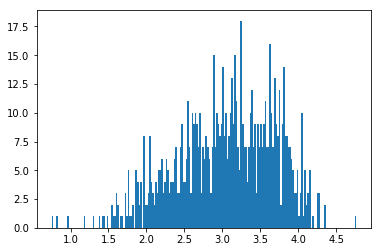

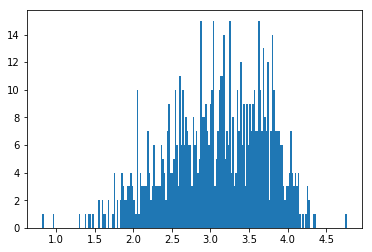

0.179211 0.179211
(1, 0.17921074)


In [120]:
MSE(v,yy_pred,mask)

In [121]:
from sklearn.metrics import mean_squared_error
u,v,w,mask=train_gen.get_by_t2(478-n_lookforward)
mask=(np.array(mask)>0)
mask.shape

(829, 1)

In [122]:
yy_pred=amodel.predict(u,4096)[0]

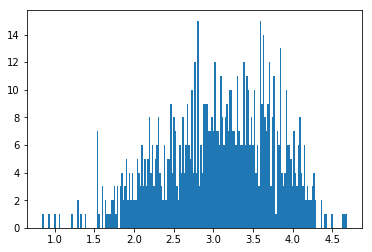

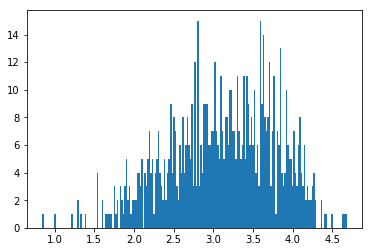

0.205287 0.205287
(1, 0.20528668)


In [123]:
MSE(v,yy_pred,mask)

In [124]:
def reverse_map(d):
    return {v:k for k,v in d.items()}
def encoding_dict(names):
    names=sorted(names)
    a=dict(enumerate(names))
    b=reverse_map(a)
    return b,a
def get_store_date_map():
    visits=pd.read_csv("../input/air_visit_data.csv",parse_dates=['visit_date'])
    stores=sorted(set(visits['air_store_id']))
    date_list=pd.date_range(pd.to_datetime("2016-01-01"),pd.to_datetime("2017-05-31"))
    return encoding_dict(stores)[1],encoding_dict(date_list)[1]

In [125]:
store_map,date_map=get_store_date_map()

In [126]:
stores=np.array([store_map[u] for u in w])
days=np.arrays=([str(date_map[u].date()) for u in range(478-n_lookforward,478)])
len(days)

1

In [127]:
date_map[478]

Timestamp('2017-04-23 00:00:00', freq='D')

In [128]:
def f(i):
    u=yy_pred[:,i]
    df=pd.DataFrame({'air_store_id':stores, 'pred':u})
    df['visit_date']=days[i]
    return df

In [129]:
preddf=pd.concat([f(i) for i in range(len(days))])
preddf['pred_visitors']=np.expm1(preddf['pred'])

In [130]:
preddf.head()

air_store_id      pred  visit_date  pred_visitors
0  air_00a91d42b08b08d9  1.668084  2017-04-22       4.302000
1  air_0164b9927d20bcc3  1.538888  2017-04-22       3.659404
2  air_0241aa3964b7f861  2.474063  2017-04-22      10.870579
3  air_0328696196e46f18  2.206060  2017-04-22       8.079868
4  air_034a3d5b40d5b1b1  3.538095  2017-04-22      33.401306

In [131]:
data=pd.read_csv("../input/air_visit_data.csv")#,date_parser='visit_date')

In [132]:
tmpdf=pd.merge(data,preddf, on = ['air_store_id','visit_date'],how='inner')

In [133]:
data.tail()

air_store_id  visit_date  visitors
252103  air_24e8414b9b07decb  2017-04-18         6
252104  air_24e8414b9b07decb  2017-04-19         6
252105  air_24e8414b9b07decb  2017-04-20         7
252106  air_24e8414b9b07decb  2017-04-21         8
252107  air_24e8414b9b07decb  2017-04-22         5

In [134]:
def g(df):
    return (mean_squared_error(np.log1p(df['visitors']),np.log1p(df['pred_visitors'])))
tmpdf.groupby('visit_date').apply(g)

visit_date
2017-04-22    0.205287
dtype: float64

In [135]:
np.sqrt(mean_squared_error(np.log1p(tmpdf['visitors']),np.log1p(tmpdf['pred_visitors'])))

0.4530857329425908

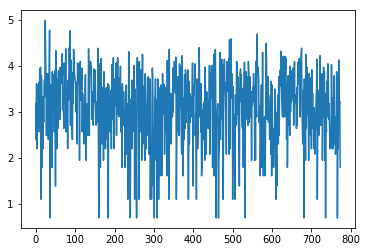

In [136]:
plt.plot(np.log1p(tmpdf['visitors']))

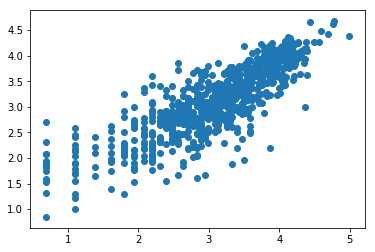

In [137]:
plt.scatter(np.log1p(tmpdf['visitors']),np.log1p(tmpdf['pred_visitors']))